In [21]:
from transformers import ViTImageProcessor
from utils import download_imagenet_labels, overlay, plot_auc_line
import time
from PIL import Image
from mlex import MLEx

# Parameters

In [22]:
# Image processor for ViT model (only used for resizing image during the plot)
resizer = ViTImageProcessor(do_rescale=False, do_normalize=False)

# URL to download ImageNet labels
imagenet_labels_url = 'https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt'
class_labels = download_imagenet_labels(imagenet_labels_url)
class_labels_lower = [cls.lower() for cls in class_labels]
imagenet_label_dict = {index: label for index, label in enumerate(class_labels)}

In [23]:
# Minimum attention % cut-off
min_cut = 0.01

# Token ratio for saliency calculation
token_ratio = 0.5

# Starting layer for saliency calculation
starting_layer = 0

# ViT

In [24]:
# Initialize MLEx model for ViT
model_vit = MLEx('vit', 'cuda:0')

## Single Image Plot

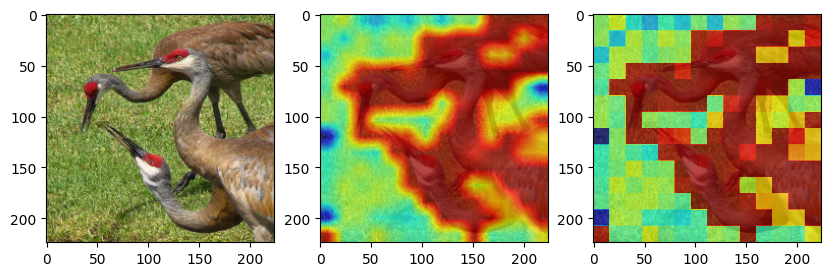

In [25]:
img_path = 'Example_imgs/crane.jpeg'

# Open the image using PIL
image = Image.open(img_path).convert('RGB')

# Resize and preprocess the image for the model
img = resizer(image, return_tensors="pt")['pixel_values'][0]

saliency, label = model_vit.get_saliency(img_path, min_cut, token_ratio, starting_layer)

# Display overlay of image and saliency map
overlay(img, saliency)

## Multi image plot with AUC

In [26]:
# Paths to images
img_paths = [
    'Example_imgs/ILSVRC2012_val_00042426.JPEG',
    'Example_imgs/ILSVRC2012_val_00008598.JPEG',
    'Example_imgs/ILSVRC2012_val_00026910.JPEG'
]

# Percentage of patches for insertion and deletion metrics
patch_perc = [1, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

# Baseline for insertion and deletion calculation
baseline = 'black'

Time taken: 0.539689302444458


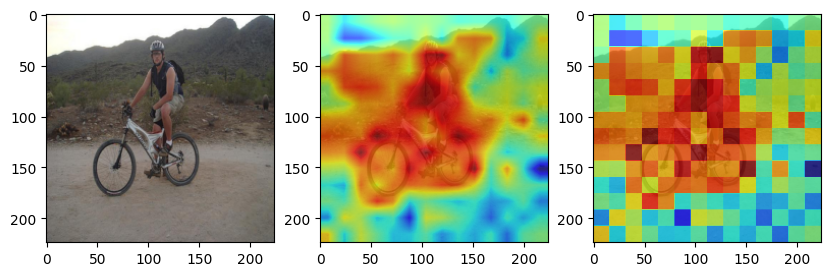

Time taken: 0.5338177680969238


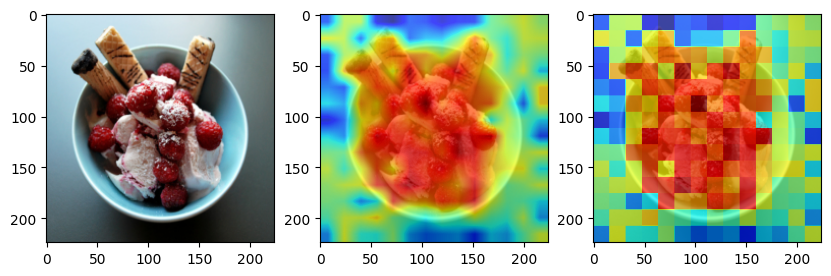

Time taken: 0.5333139896392822


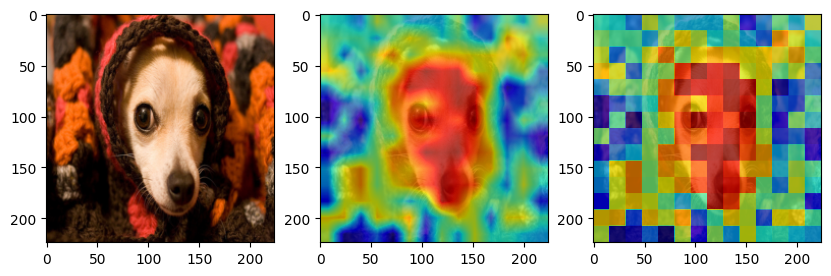

In [27]:
# Lists to store metrics, images, and labels
metrics_list = []
images_list = []
label_list = []
saliency_list = []

# Loop over each image path
for i in range(len(img_paths)):
    img_path = img_paths[i]
    start_time = time.time()

    # Get saliency map and label using MLEx model
    saliency, label = model.get_saliency(img_path, min_cut, token_ratio, starting_layer)
    print(f'Time taken: {time.time() - start_time}')

    # Open the image using PIL
    image = Image.open(img_path).convert('RGB')

    # Resize and preprocess the image for the model
    img = resizer(image, return_tensors="pt")['pixel_values'][0]

    # Display overlay of image and saliency map
    overlay(img, saliency)

    # Get insertion and deletion metrics
    metrics = model.get_insertion_deletion(patch_perc, saliency, image, baseline, label)

    # Append metrics, image, and label to respective lists
    metrics_list.append(metrics)
    images_list.append(img)
    label_list.append(imagenet_label_dict[label + 1])
    saliency_list.append(saliency)

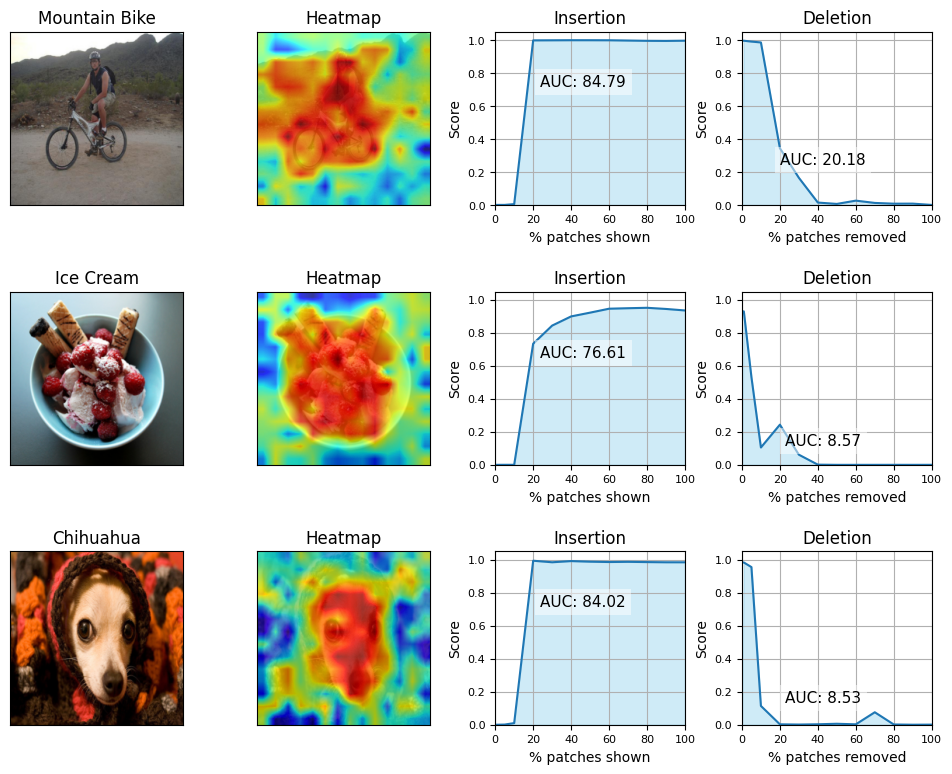

In [28]:
# Plot AUC curves for insertion and deletion metrics
plot_auc_line(metrics_list, patch_perc, images_list, label_list, saliency_list, figsize_x = 12, alpha = 0.75)

# DeiT

In [29]:
# Initialize MLEx model for ViT
model_deit = MLEx('deit', 'cuda:0')

## Single Image Plot

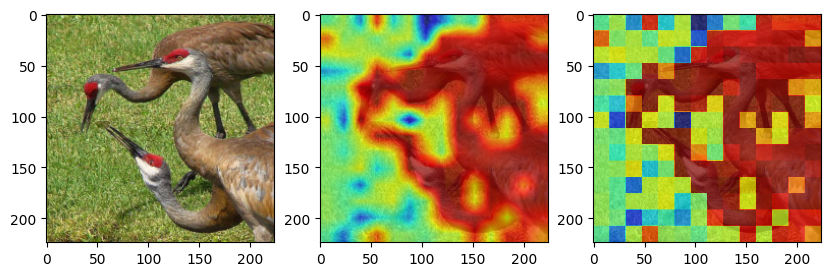

In [30]:
img_path = 'Example_imgs/crane.jpeg'

# Open the image using PIL
image = Image.open(img_path).convert('RGB')

# Resize and preprocess the image for the model
img = resizer(image, return_tensors="pt")['pixel_values'][0]

saliency, label = model_deit.get_saliency(img_path, min_cut, token_ratio, starting_layer)

# Display overlay of image and saliency map
overlay(img, saliency)

## Multi image plot with AUC

In [31]:
# Paths to images
img_paths = [
    'Example_imgs/ILSVRC2012_val_00042426.JPEG',
    'Example_imgs/ILSVRC2012_val_00008598.JPEG',
    'Example_imgs/ILSVRC2012_val_00026910.JPEG'
]

# Percentage of patches for insertion and deletion metrics
patch_perc = [1, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

# Baseline for insertion and deletion calculation
baseline = 'black'

Time taken: 0.7718517780303955


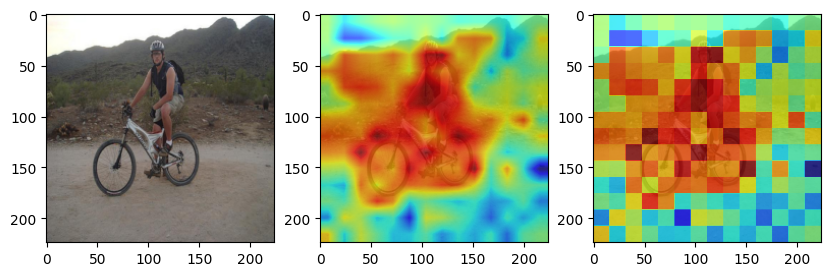

Time taken: 0.5369007587432861


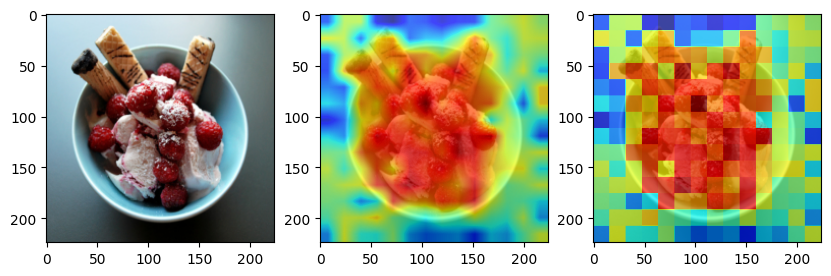

Time taken: 0.5349926948547363


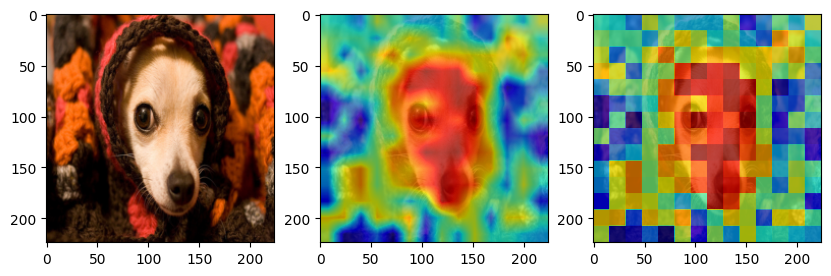

In [32]:
# Lists to store metrics, images, and labels
metrics_list = []
images_list = []
label_list = []
saliency_list = []

# Loop over each image path
for i in range(len(img_paths)):
    img_path = img_paths[i]
    start_time = time.time()

    # Get saliency map and label using MLEx model
    saliency, label = model.get_saliency(img_path, min_cut, token_ratio, starting_layer)
    print(f'Time taken: {time.time() - start_time}')

    # Open the image using PIL
    image = Image.open(img_path).convert('RGB')

    # Resize and preprocess the image for the model
    img = resizer(image, return_tensors="pt")['pixel_values'][0]

    # Display overlay of image and saliency map
    overlay(img, saliency)

    # Get insertion and deletion metrics
    metrics = model.get_insertion_deletion(patch_perc, saliency, image, baseline, label)

    # Append metrics, image, and label to respective lists
    metrics_list.append(metrics)
    images_list.append(img)
    label_list.append(imagenet_label_dict[label + 1])
    saliency_list.append(saliency)

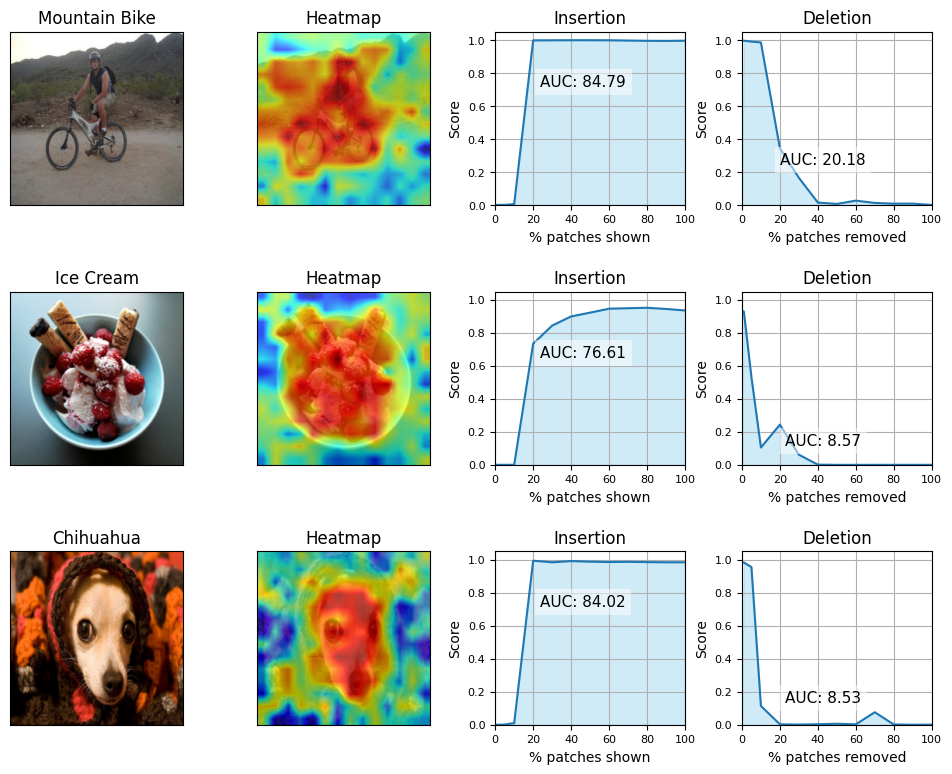

In [33]:
# Plot AUC curves for insertion and deletion metrics
plot_auc_line(metrics_list, patch_perc, images_list, label_list, saliency_list, figsize_x = 12)